**Business Problem**

To examine the data provided by Netflix and derive valuable observations to aid the company in making informed decisions regarding the content they should produce and devising strategies to expand their business in various countries.

In [1]:
#Importing all libaries to be used in this business case study.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as clr

**1. Uploading Netflix data**

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 24.7MB/s]


In [3]:
!ls

netflix.csv  sample_data


In [4]:
nfdata = pd.read_csv('netflix.csv')

**2. Exploring the data**

In [5]:
nfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
nfdata.shape

(8807, 12)

In [7]:
nfdata.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
nfdata['show_id'].unique

<bound method Series.unique of 0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object>

In [9]:
nfdata['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
nfdata['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [11]:
nfdata['director'].unique()


array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [12]:
nfdata['cast'].unique()

array([nan,
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [13]:
nfdata['country'].nunique

<bound method IndexOpsMixin.nunique of 0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object>

In [14]:
nfdata['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [15]:
nfdata['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [16]:
nfdata['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
nfdata['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [18]:
nfdata['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [19]:
nfdata['listed_in'].unique

<bound method Series.unique of 0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object>

In [20]:
no_of_records= nfdata.shape[0]
no_of_records

8807

In [21]:
no_of_features = nfdata.shape[1]
no_of_features

12

In [22]:
nfdata.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

The original dataset we received contains a total of 8807 entries, including both movies and TV shows. Each entry in the dataset consists of 12 attributes.

Here are key insights based on my understanding of data provided after analyzing each column provided by Netflix:

- show_id: Each entry in this column represents a unique identifier for a movie or TV show in the dataset. It is a distinctive ID assigned by the Netflix team to identify the content.

- type: This column categorizes whether the uploaded title is a movie or a TV show.

- title: The names of the TV shows or movies are listed in this column.

- director: This column contains the names of the directors of the TV shows or movies.

- cast: The names of the actor(s) associated with each movie or TV show are listed in this column. It can include multiple names.

- country: This column specifies the name(s) of the country or countries where a movie or TV show was released.

- date_added: The date when a movie or TV show was added to the Netflix platform is recorded in this column.

- release_year: This column indicates the original release year of the movie or TV show, independent of the date it was added to Netflix.

- rating: The rating certificate assigned by the movie board authority of a specific country is listed in this column. It is worth noting that the ratings can vary across different countries.

- duration: This column provides information about the runtime of a movie and the number of seasons if it is a TV show.

- listed_in: Each movie or TV show is assigned one or multiple genres, which are listed in this column.

- description: This column contains a brief summary or description of each movie or TV show.

**3. Data Cleaning**

Prior to performing data cleaning, it is crucial to comprehend the primary objective behind cleaning the data. While all the information in the Netflix Dataset holds significance, it is essential to ensure that the records are refined to facilitate improved comprehension through visual or non-visual analysis. This analysis will aid in understanding the business trends and patterns over time.

In this case study, We are going to perform data cleaning steps as follows:

3.1) Split Data from selected columns

3.2) Split the data of one column to multiple columns

3.3) Delete unwanted column

3.4) Find and Impute Null Value

3.5) Converting Data Type of Columns

**3.1) Split Data from Selected Columns:**

In order to handle the situation where columns such as "director," "cast," "country," and "listed_in" contain multiple data within a single record, it is recommended to split the data into multiple records as follows:

"director": For movies or TV shows with multiple directors, each director's name can be replicated to create a new record for each director individually. This allows us to analyze the data for each director separately.

"cast": In cases where movies or TV shows have multiple actors, creating separate records for each actor by replicating the other column data would facilitate analyzing the data for each actor individually in subsequent analysis.

"country": If a movie or TV show was released in multiple countries, it would be beneficial to have separate records for each country. This approach enables a better understanding of the data based on different countries.

"listed_in": Since a movie or TV show can belong to multiple genres, splitting the genres into separate records would assist in analyzing the data based on individual genres.

By splitting the data into multiple records based on these columns, we can enhance the granularity and flexibility of our analysis.

In [23]:
nfdata = nfdata.assign(director = nfdata["director"].str.split(", ")).explode("director")
nfdata= nfdata.assign(cast = nfdata["cast"].str.split(", ")).explode("cast")
nfdata = nfdata.assign(country = nfdata["country"].str.split(", ")).explode("country")
nfdata = nfdata.assign(listed_in = nfdata["listed_in"].str.split(", ")).explode("listed_in")


In [24]:
nfdata.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


In [25]:
nfdata.reset_index(drop = True, inplace = True)


In [26]:
nfdata.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


**3.2) Split the data of one column to multiple columns**

For enhanced analysis, it is evident that the "date_added" column can be divided into two separate columns, namely "year_added_to_netflix" and "month_added_to_netflix". This division allows for a more detailed examination of the data. 

Additionally, we can further split the "duration" column into "duration_in_minutes" for movies and "no_of_seasons" for TV shows. By converting the values to integers, we can facilitate more effective analysis and comparisons.

In [27]:
nfdata.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

To proceed with the analysis, it is important to note that the data type of the "date_added" column is currently set as "Object" instead of "date". Therefore, the first step would be to convert the data type of this column to "date" to ensure accurate analysis.

Additionally, let's convert the data type of the "duration" column to string for further processing.

In [28]:
nfdata['date_added'] = pd.to_datetime(nfdata['date_added'])

After successfully converting the data type of the "date_added" column, we can proceed with creating two new columns to facilitate further analysis:

"month": This column will be populated with the name of the month in which a movie or TV show was added to Netflix.

"year_added_on_netflix": This column will contain the year in which a movie or TV show was added to Netflix, irrespective of the original release year of the content.

These additional columns will provide valuable information for analyzing the dataset and understanding trends based on the specific month and year when the content was added to Netflix.

In [29]:
nfdata.insert(7, 'month', nfdata['date_added'].dt.month_name())


In [30]:
nfdata.head(3)

,show_id,type,title,director,cast,country,date_added,month,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,September,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [31]:
nfdata.insert(8, 'year', nfdata['date_added'].dt.year)

In [32]:
nfdata['year']

0         2021.0
1         2021.0
2         2021.0
3         2021.0
4         2021.0
           ...  
201986    2019.0
201987    2019.0
201988    2019.0
201989    2019.0
201990    2019.0
Name: year, Length: 201991, dtype: float64

In [33]:
nfdata.head(5)

,show_id,type,title,director,cast,country,date_added,month,year,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,September,2021.0,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


Having extracted the month and year of the movie or TV show that was added to Netflix, let's now focus on the "duration" column. It currently contains the runtime in minutes for movies as well as the number of seasons for TV shows. To avoid any confusion during data analysis, it is advisable to split this column into two separate columns.

To proceed with the split, we should first ensure that the data type of the "duration" column is converted to string. This will enable us to perform the subsequent splitting of the column into:

"no_of_seasons": This new column will capture the number of seasons for TV shows.

"duration_in_minutes": This new column will hold the runtime in minutes for movies.

By converting the data type to string and splitting the "duration" column, we enhance the clarity and ease of analyzing these specific attributes separately for movies and TV shows.

In [34]:
nfdata['duration'] = nfdata['duration'].astype(str)

In [35]:
def splitdata(x):
  if x== np.NaN:
    return 0
  else:
    y= x.split()[0]
    return y

In [36]:
nfdata.insert(11, 'Minutes', nfdata[nfdata['type']=='Movie']['duration'].apply(splitdata))

In [37]:
nfdata.insert(11, 'no_of_seasons', nfdata[nfdata['type']=='TV Show']['duration'].apply(splitdata))

In [38]:
nfdata.head(5)

,show_id,type,title,director,cast,country,date_added,month,year,release_year,rating,no_of_seasons,Minutes,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,September,2021.0,2020,PG-13,NaN,90,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


**3.3) Delete unwanted column:**

Upon reviewing the data in each column, it appears that the "description" column may not provide significant utility for analysis at this moment. Additionally, since we have already split the "duration" column into separate columns for duration in minutes and number of seasons, we can consider removing the original "duration" column.

To remove these columns, we can proceed with the deletion (dropping) process. By eliminating unnecessary columns, we can streamline the dataset and focus on the relevant attributes that contribute to our analysis.

In [39]:
nfdata.drop(['description','duration'],axis=1, inplace=True)

In [40]:
nfdata.head(5)

,show_id,type,title,director,cast,country,date_added,month,year,release_year,rating,no_of_seasons,Minutes,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,September,2021.0,2020,PG-13,NaN,90,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,TV Dramas
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,International TV Shows


**3.4) Find and Impute Null/NaN Values**

Analysing Null values in various columns:

In [41]:
no_of_records= nfdata.shape[0]
no_of_features= nfdata.shape[1]
no_of_records, no_of_features

(201991, 14)

In [42]:
nfdata.isna().sum()

show_id               0
type                  0
title                 0
director          50643
cast               2146
country           11897
date_added          158
month               158
year                158
release_year          0
rating               67
no_of_seasons    145843
Minutes           56148
listed_in             0
dtype: int64

Based on the provided data, we can observe that there are a total of 201,991 records in the dataset. Among these records, several columns contain NaN (missing) values. The columns with missing values include:

"director"
"cast"
"country"
"date_added"
"month"
"year_added_on_netflix"
"rating"
"no_of_seasons"
"duration_in_minutes"
These columns require further attention to handle the missing values appropriately. Depending on the specific analysis and goals, different strategies such as imputation or removal of records with missing values can be employed to ensure accurate and reliable analysis results.

**Deleting Subset of records:**


Upon examining the dataset, it is evident that the columns "date_added," "month," "year_added_on_netflix," and "rating" have missing values that account for less than 1% of the total records in the Netflix dataset. Given this low percentage, removing these records with missing values is unlikely to have a significant impact on data analysis or business decision-making.

If the missing values in these columns do not significantly affect the overall analysis or objectives, deleting these records can be a reasonable approach to ensure data completeness and reliability. However, it is important to carefully evaluate the impact of removing these records on the specific analysis or goals at hand before proceeding with the deletion.

In [43]:
nfdata.dropna(subset=['date_added','month','year','rating'], inplace = True)
nfdata.isnull().sum()

show_id               0
type                  0
title                 0
director          50425
cast               2146
country           11894
date_added            0
month                 0
year                  0
release_year          0
rating                0
no_of_seasons    145834
Minutes           55932
listed_in             0
dtype: int64

**Impute/Filling data:**

We have created new columns "no_of_seasons" and "duration_in_minutes," we can proceed with handling the missing values in these columns.

For the "no_of_seasons" column, since it is only applicable to records with the type "TV Show," we can fill the missing values in other records (where the type is "Movie") with 0. This ensures consistency and avoids assigning irrelevant values to movie entries.

Regarding the "duration_in_minutes" column, which was originally provided for movies only, all the records with the type "TV Show" would show as null in this column after the split. To address this, we can fill the missing values in the "duration_in_minutes" column for TV shows with 0, as the concept of duration in minutes does not apply to TV shows.

By filling the missing values in these new columns appropriately, we ensure consistency in the dataset and prepare it for further analysis.

In [44]:
nfdata.head(2)

,show_id,type,title,director,cast,country,date_added,month,year,release_year,rating,no_of_seasons,Minutes,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,September,2021.0,2020,PG-13,NaN,90,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,September,2021.0,2021,TV-MA,2,NaN,International TV Shows


In [45]:
nfdata[['no_of_seasons','Minutes']] = nfdata[['no_of_seasons','Minutes']].fillna(0)

In [46]:
nfdata.shape[0]

201766

In [47]:
nfdata.isnull().sum()

show_id              0
type                 0
title                0
director         50425
cast              2146
country          11894
date_added           0
month                0
year                 0
release_year         0
rating               0
no_of_seasons        0
Minutes              0
listed_in            0
dtype: int64

Replacing Null Values from Director Column:


In order to fill the null values in the "director" column, a careful approach is required considering the dynamic nature of directors changing over time and across different countries.

To handle this, we can utilize the information from the "release_year" and "country" columns to find the most appropriate mode value for each specific scenario. By grouping the data based on the combination of "release_year" and "country" and finding the mode of the directors within each group, we can determine the best possible mode value to fill the null values in the "director" column.

This approach takes into account the specific context of each movie or TV show, considering the year of release and the country of origin. By applying this methodology, we can ensure that the filled values align more accurately with the actual directors associated with each production.

In [48]:
for i in nfdata[(nfdata["director"].isnull())]["release_year"].unique():
  for j in nfdata[(nfdata["director"].isnull())]["country"].unique():
    if j != np.NaN:
      director_mode = nfdata[(nfdata["release_year"]==i) & (nfdata["country"]==j)]["director"].mode()
      if len(director_mode) != 0:
        nfdata.loc[(nfdata["release_year"]==i) & (nfdata["country"]==j), "director"] = nfdata.loc[(nfdata["release_year"]==i) & (nfdata["country"]==j),
"director"].fillna(director_mode[0])

In [49]:
nfdata.isna().sum()

show_id              0
type                 0
title                0
director          7700
cast              2146
country          11894
date_added           0
month                0
year                 0
release_year         0
rating               0
no_of_seasons        0
Minutes              0
listed_in            0
dtype: int64

The remaining records with null values are 7700 under "director" column. So we shall fill it with the value as "Unknown Director" to make sure we don't just fill any random director name.

In [50]:
nfdata["director"].fillna("Unknown Director", inplace= True)
nfdata.isna().sum()

show_id              0
type                 0
title                0
director             0
cast              2146
country          11894
date_added           0
month                0
year                 0
release_year         0
rating               0
no_of_seasons        0
Minutes              0
listed_in            0
dtype: int64

Replacing Null Values from Country Column:

To address the null values in the "country" column, it is important to consider a more nuanced approach that takes into account the relationship between the "director" and "release_year" columns. Simply finding the mode of the entire "country" column and filling the null values may not provide accurate results.

By considering the combination of the "director" and "release_year" columns, we can determine the mode of the "country" for each specific director and release year. This approach ensures that the filled values align more closely with the actual countries associated with each director and release year combination.

Taking this approach enables us to impute the null values in the "country" column more accurately, resulting in a cleaner dataset and enhancing the quality of the analysis.

In [51]:
for i in nfdata[(nfdata["country"].isnull())]["director"].unique():
  for j in nfdata[(nfdata["country"].isnull())]["release_year"].unique():
    country_mode = nfdata[(nfdata["director"]==i) & (nfdata["release_year"]==j)]["country"].mode()
    if len(country_mode) != 0:
      nfdata.loc[(nfdata["director"]==i) & (nfdata["release_year"]==j), "country"] = nfdata.loc[(nfdata["director"]==i) & (nfdata["release_year"]==j)
, "country"].fillna(country_mode[0])


In [52]:
nfdata.isna().sum()

show_id             0
type                0
title               0
director            0
cast             2146
country          6110
date_added          0
month               0
year                0
release_year        0
rating              0
no_of_seasons       0
Minutes             0
listed_in           0
dtype: int64

The remaining records with null values are 6100 under "country" column. So we shall fill it with the value as "Unknown Country" to make sure we don't just fill any random country name.


In [53]:
nfdata["country"].fillna("Unknown Country", inplace= True)

In [54]:
nfdata.isna().sum()

show_id             0
type                0
title               0
director            0
cast             2146
country             0
date_added          0
month               0
year                0
release_year        0
rating              0
no_of_seasons       0
Minutes             0
listed_in           0
dtype: int64

Replacing Null Values in Cast Column:

When addressing the null values in the "cast" column, it is essential to consider the dynamic nature of the cast members, which can vary over time and across different countries.

To handle this, we can leverage the information provided by the "release_year" and "country" columns to find the most appropriate mode value for each specific scenario. By grouping the data based on the combination of "release_year" and "country" and determining the mode of the cast within each group, we can identify the best possible mode value to fill the null values in the "cast" column.

By adopting this approach, we take into account the specific context of each movie or TV show, considering the year of release and the country of origin. Filling the null values with the mode cast members within each group ensures a more accurate representation of the actual cast associated with each production, resulting in cleaner data and enhancing the quality of analysis.

In [55]:
for i in nfdata[(nfdata["cast"].isnull())]["country"].unique():
  if i != "Unknown Country":
    for j in nfdata[(nfdata["cast"].isnull())]["release_year"].unique():
      cast_mode = nfdata[(nfdata["country"]==i) & (nfdata["release_year"]==j)]["cast"].mode()
      if len(cast_mode) != 0:
        nfdata.loc[(nfdata["country"]==i) & (nfdata["release_year"]==j), "cast"] = nfdata.loc[(nfdata["country"]==i) & (nfdata["release_year"]==j), "cast"].fillna(cast_mode[0])

In [ ]:
nfdata.isnull().sum()

Now we are left with 216 null values under cast, so we can fill those recods with "Unknown Cast" as it is less than 1% of the entire data.

In [ ]:
nfdata['cast'].fillna( 'Unknown Cast', inplace= True)

In [ ]:
#Final check of Null values in each column
nfdata.isnull().sum()

**3.5) Converting Data Type of Columns**

It is advisable to convert the columns of type "Object" into type "String" for better consistency and ease of analysis. While the "Object" type can encompass various data types such as strings, unicode, or mixed types, converting them to "String" ensures uniformity in the dataset.

By converting the columns to type "String," we establish a clearer understanding of the data and enable more efficient manipulation and analysis. This conversion enhances data quality and facilitates seamless processing, allowing for effective utilization of the dataset.

We should also convert a few columns from type object to type int for better understanding of data.


In [ ]:
nfdata.dtypes

Certainly! If there are "NaN" values present in the "duration_in_minutes" column, it would be appropriate to replace them with a value of 0. This replacement ensures consistency and allows for more accurate analysis by treating the missing duration values as zero minutes.

In [60]:
nfdata[nfdata['Minutes'] == 'nan']

,show_id,type,title,director,cast,country,date_added,month,year,release_year,rating,no_of_seasons,Minutes,listed_in
126537,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,April,2017.0,2017,74 min,0,nan,Movies
131603,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,September,2016.0,2010,84 min,0,nan,Movies
131737,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,August,2016.0,2015,66 min,0,nan,Movies


In [61]:
nfdata.loc[nfdata['Minutes'] == "nan","Minutes"] = 0

In [62]:
nfdata = nfdata.astype({"show_id": str, "type": str, "title": str, "director": str, "cast": str, "country": str,
"month": str, "year": int, "rating": str,
"no_of_seasons": int, "Minutes": int, "listed_in": str})

In [63]:
nfdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201766 entries, 0 to 201990
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   show_id        201766 non-null  object        
 1   type           201766 non-null  object        
 2   title          201766 non-null  object        
 3   director       201766 non-null  object        
 4   cast           201766 non-null  object        
 5   country        201766 non-null  object        
 6   date_added     201766 non-null  datetime64[ns]
 7   month          201766 non-null  object        
 8   year           201766 non-null  int64         
 9   release_year   201766 non-null  int64         
 10  rating         201766 non-null  object        
 11  no_of_seasons  201766 non-null  int64         
 12  Minutes        201766 non-null  int64         
 13  listed_in      201766 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(9)
memory usa

**4) Non-Graphical Analysis**

In [64]:
nfdata

,show_id,type,title,director,cast,country,date_added,month,year,release_year,rating,no_of_seasons,Minutes,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Andre Robinson,United States,2021-09-25,September,2021,2020,PG-13,0,90,Documentaries
1,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,2021-09-24,September,2021,2021,TV-MA,2,0,International TV Shows
2,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,2021-09-24,September,2021,2021,TV-MA,2,0,TV Dramas
3,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,2021-09-24,September,2021,2021,TV-MA,2,0,TV Mysteries
4,s2,TV Show,Blood & Water,Adze Ugah,Khosi Ngema,South Africa,2021-09-24,September,2021,2021,TV-MA,2,0,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,March,2019,2015,TV-14,0,111,International Movies
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,March,2019,2015,TV-14,0,111,Music & Musicals
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,March,2019,2015,TV-14,0,111,Dramas
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,March,2019,2015,TV-14,0,111,International Movies


After performing data cleaning and imputing null or missing values, the total number of records in the dataset has increased to 201,766. This increase is a result of creating separate records for each director, cast member, country, and listed_in genre.

By splitting the data into multiple records for these columns, we gain a more detailed and comprehensive understanding of the dataset. This expanded dataset allows for more granular analysis and facilitates exploring trends and patterns associated with individual directors, cast members, countries, and genres.

The increased number of records provides a richer dataset for further analysis and enables a more nuanced exploration of the Netflix data.

In [65]:
#Total number of records in Netflix Data after cleaning and imputing data
nfdata.shape[0], nfdata.shape[1]

(201766, 14)

In the data cleaning process, a few columns were deleted, while 4 new columns were added. As a result, the total number of attributes in the dataset has increased to 14.

By removing certain columns and adding new ones, the dataset has been refined and augmented to better suit the analytical needs. This adjustment in the number of attributes allows for a more focused analysis and provides additional information that can contribute to a comprehensive understanding of the Netflix data.

In [66]:
#Name of total attributes after data cleaning and Impute
nfdata.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'month', 'year', 'release_year', 'rating', 'no_of_seasons', 'Minutes',
       'listed_in'],
      dtype='object')

In [67]:
# Type of contents on Netflix
nfdata['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Though we know that the total content that was released on Netflix it would make it easier to know how many of those are movie and how many of those are tv shows to make better business decisions for future

In [68]:
#Total count of content type released on Netflix

content_type= nfdata.groupby('type')['title'].nunique()
print('Movies released on Netflix:',content_type.values[0])
print('TV Show released on Netflix:', content_type.values[1])

Movies released on Netflix: 6129
TV Show released on Netflix: 2664


When did Netflix start adding content on their platform?

In [69]:
#First Content Release Year
first_content_release_year_on_netflix = nfdata[nfdata["year"] == min(nfdata["year"])]["year"]
print("Year when first content was added on Netflix:",first_content_release_year_on_netflix.values[0])

Year when first content was added on Netflix: 2008


When was the last content uploaded as per the dataset?


In [70]:
#Latest Content Release Year
last_content_release_year_on_netflix = nfdata[nfdata["year"] == max(nfdata["year"])]["year"]
print("Year when latest content was added on Netflix:",last_content_release_year_on_netflix.values[0])

Year when latest content was added on Netflix: 2021


How much of the content that was uploaded on Netflix is older than the time from when they started uploading in 2008?

How many of those are movies and how many of those are TV Shows?

In [71]:
#Total Content that have originally released before the first content added on Netflix
total_count_released_before_netflix = nfdata[nfdata["release_year"] < min(nfdata["year"])]["title"].nunique()
total_count_movie_released_before_netflix = nfdata[(nfdata["release_year"] < min(nfdata["year"])) & (nfdata["type"] == "Movie")]["title"].nunique(
)
total_count_tvshow_released_before_netflix = nfdata[(nfdata["release_year"] < min(nfdata["year"])) & (nfdata["type"] == "TV Show")]["title"].nunique()
print("Total number of content that were released before Netflix started adding content on their platform:", total_count_released_before_netflix)
print("Total number of movies that released before Netflix started adding content on their platform:", total_count_movie_released_before_netflix)
print("Total number of tv shows that released before Netflix started adding content on their platform:", total_count_tvshow_released_before_netflix)

Total number of content that were released before Netflix started adding content on their platform: 1045
Total number of movies that released before Netflix started adding content on their platform: 922
Total number of tv shows that released before Netflix started adding content on their platform: 123


How many directors content have been uploaded on Netflix till date?

How many of those are Movie directors and how many are TV Show directors?


In [72]:
#Total Unique Directors
total_unique_directors = nfdata.groupby("type")["director"].nunique().sort_values(ascending = False)
print("Total Overall Unique Directors:",total_unique_directors.sum())
print("Total Unique Movie Directors:",total_unique_directors.values[0])
print("Total Unique TV Show Directors:", total_unique_directors.values[1])

Total Overall Unique Directors: 5340
Total Unique Movie Directors: 4786
Total Unique TV Show Directors: 554


How many cast content have been uploaded on Netflix till date?

How many of those are Movie cast and how many are TV Show cast?


In [73]:
#Total Unique Cast
total_unique_cast = nfdata.groupby("type")["cast"].nunique().sort_values(ascending = False)
print("Total Overall Unique Cast:",total_unique_cast.sum())
print("Total Unique Movie Cast:",total_unique_cast.values[0])
print("Total Unique TV Show Cast:", total_unique_cast.values[1])


Total Overall Unique Cast: 40800
Total Unique Movie Cast: 25964
Total Unique TV Show Cast: 14836


Who is the top director who has released most movies on Netflix

In [74]:
#Director with most directed movies released on Netflix
director_with_most_movies = nfdata[nfdata["type"] == "Movie"].groupby("director")["title"].nunique().sort_values(ascending = False)[1:2]
print("Name of the top Movie director:",director_with_most_movies.index[0])
print("Number of Movies",director_with_most_movies.index[0], "directed:",director_with_most_movies.values[0])

Name of the top Movie director: Rajiv Chilaka
Number of Movies Rajiv Chilaka directed: 22


Who is the top director who has released most tv shows on Netflix?


In [75]:
#Director with most directed TV Shows released on Netflix
director_with_most_movies = nfdata[nfdata["type"] == "TV Show"].groupby("director")["title"].nunique().sort_values(ascending = False)[1:2]
print("Name of the top TV Show director:",director_with_most_movies.index[0])
print("Number of TV Shows",director_with_most_movies.index[0], "directed:",director_with_most_movies.values[0])


Name of the top TV Show director: Greg Rankin
Number of TV Shows Greg Rankin directed: 174


Which movie cast has got the highest number of content uploaded on Netflix?

In [76]:
#Cast with most movies acted in that released on Netflix
cast_with_most_movies = nfdata[nfdata["type"] == "Movie"].groupby("cast")["title"].nunique().sort_values(ascending = False)
print("Name of the top Movie Actor:",cast_with_most_movies.index[0])
print(cast_with_most_movies.index[0], "acted in",cast_with_most_movies.values[0],"Movies.")

Name of the top Movie Actor: James Franco
James Franco acted in 88 Movies.


Which tv show cast has got the highest number of content uploaded on Netflix?

In [77]:
#Cast with most TV Shows acted in that released on Netflix
cast_with_most_tvshows = nfdata[nfdata["type"] == "TV Show"].groupby("cast")["title"].nunique().sort_values(ascending = False)
print("Name of the top TV Show Actor:",cast_with_most_tvshows.index[0])
print(cast_with_most_tvshows.index[0], "acted in",cast_with_most_tvshows.values[0],"TV Shows.")

Name of the top TV Show Actor: Andre Robinson
Andre Robinson acted in 43 TV Shows.


In which year did Netflix upload highest number of Movies on their platform?

How many movies did they upload in that year?

In [79]:
#Year with the most released Movies on Netflix
year_with_most_movies_released_on_netflix = nfdata[nfdata["type"] == "Movie"].groupby("year")["title"].nunique().sort_values(ascending = False)
print("Year with most Movie releases:", year_with_most_movies_released_on_netflix.index[0])
print("A total of",year_with_most_movies_released_on_netflix.values[0],"movies released in the year of", year_with_most_movies_released_on_netflix.index[0] )

Year with most Movie releases: 2019
A total of 1424 movies released in the year of 2019


In which month did Netflix upload highest number of Movies on their platform?

How many movies did they upload in that month?

In [80]:
#Month with the most released Movies on Netflix
month_with_most_movies_released_on_netflix = nfdata[nfdata["type"] == "Movie"].groupby("month")["title"].nunique().sort_values(ascending = False)
print("Month with most Movie releases:", month_with_most_movies_released_on_netflix.index[0])
print("A total of",month_with_most_movies_released_on_netflix.values[0], "Movies released on netflix in the month of",month_with_most_movies_released_on_netflix.index[0],"in the period of",last_content_release_year_on_netflix.values[0]-first_content_release_year_on_netflix.values[0],"years, since Netflix has been adding content on it's platform.")

Month with most Movie releases: July
A total of 565 Movies released on netflix in the month of July in the period of 13 years, since Netflix has been adding content on it's platform.


What is the oldest movie to have gotten released on Netflix and when was it originally release and the date on which it was uploaded on netflix?


In [81]:
#Oldest Movie released on Netlfix
old_movie_name_on_netflix = nfdata[(nfdata["release_year"] == min(nfdata[nfdata["type"] == "Movie"]["release_year"])) & (nfdata["type"] == "Movie")]["title"]
old_movie_dateadded_on_netflix = nfdata[(nfdata["release_year"] == min(nfdata[nfdata["type"] == "Movie"]["release_year"])) & (nfdata["type"] == "Movie")]["date_added"].dt.date
old_movie_releaseyear_on_netflix = nfdata[(nfdata["release_year"] == min(nfdata[nfdata["type"] == "Movie"]["release_year"])) & (nfdata["type"] == "Movie")]["release_year"]
print("Oldest Movie to get released on Netflix:", old_movie_name_on_netflix.values[0])
print("Date on which", old_movie_name_on_netflix.values[0], "was added on netflix", old_movie_dateadded_on_netflix.values[0])
print(old_movie_name_on_netflix.values[0],"was orginally released in the year:", old_movie_releaseyear_on_netflix.values[0])


Oldest Movie to get released on Netflix: Prelude to War
Date on which Prelude to War was added on netflix 2017-03-31
Prelude to War was orginally released in the year: 1942


What is the latest movie to have gotten released on Netflix and when was it originally release and the date on which it was uploaded on netflix?

In [82]:
 #Latest Movie released on Netlfix
last_movie_name_on_netflix = nfdata[(nfdata["release_year"] == max(nfdata[nfdata["type"] == "Movie"]["release_year"])) & (nfdata["type"] == "Movie")]["title"]
last_movie_dateadded_on_netflix = nfdata[(nfdata["release_year"] == max(nfdata[nfdata["type"] == "Movie"]["release_year"])) & (nfdata["type"] == "Movie")]["date_added"].dt.date
last_movie_releaseyear_on_netflix = nfdata[(nfdata["release_year"] == max(nfdata[nfdata["type"] == "Movie"]["release_year"])) & (nfdata["type"] == "Movie")]["release_year"]
print("Oldest Movie to get released on Netflix:", last_movie_name_on_netflix.values[0])
print("Date on which", last_movie_name_on_netflix.values[0], "was added on netflix", last_movie_dateadded_on_netflix.values[0])
print(last_movie_name_on_netflix.values[0],"was orginally released in the year:", last_movie_releaseyear_on_netflix.values[0])

Oldest Movie to get released on Netflix: My Little Pony: A New Generation
Date on which My Little Pony: A New Generation was added on netflix 2021-09-24
My Little Pony: A New Generation was orginally released in the year: 2021


In which year did Netflix upload highest number of TV Shows on their platform?

How many tv shows did they upload in that year?

In [83]:
#Year with the most released TV Shows on Netflix
year_with_most_tvshows_released_on_netflix = nfdata[nfdata["type"] == "TV Show"].groupby("year")["title"].nunique().sort_values(ascending = False)
print("Year with most TV Show releases:", year_with_most_tvshows_released_on_netflix.index[0])
print("A total of", year_with_most_tvshows_released_on_netflix.values[0],"TV shows released in the year of",year_with_most_tvshows_released_on_netflix.index[0])

Year with most TV Show releases: 2020
A total of 595 TV shows released in the year of 2020


In which month did Netflix upload highest number of TV Shows on their platform?

How many tv shows did they upload in that month?


In [84]:
#Month with the most released TV Shows on Netflix
month_with_most_tvshows_released_on_netflix = nfdata[nfdata["type"] == "TV Show"].groupby("month")["title"].nunique().sort_values(ascending = False)
print("Year with most TV Show releases:", month_with_most_tvshows_released_on_netflix.index[0])
print("A total of",month_with_most_tvshows_released_on_netflix.values[0], "Movies released on netflix in the month of",month_with_most_tvshows_released_on_netflix.index[0],"in the period of",last_content_release_year_on_netflix.values[0]-first_content_release_year_on_netflix.values[0],"years, since Netflix has been adding content on it's platform.")


Year with most TV Show releases: December
A total of 265 Movies released on netflix in the month of December in the period of 13 years, since Netflix has been adding content on it's platform.


What is the oldest tv show to have gotten released on Netflix and when was it originally release and the date on which it was uploaded on netflix?

In [85]:
#Oldest TV Show released on Netflix
old_tvshow_name_on_netflix = nfdata[(nfdata["release_year"] == min(nfdata[nfdata["type"] == "TV Show"]["release_year"])) & (nfdata["type"] == "TV Show")]["title"]
old_tvshow_dateadded_on_netflix = nfdata[(nfdata["release_year"] == min(nfdata[nfdata["type"] == "TV Show"]["release_year"])) & (nfdata["type"] == "TV Show")]["date_added"].dt.date
old_tvshow_releaseyear_on_netflix = nfdata[(nfdata["release_year"] == min(nfdata[nfdata["type"] == "TV Show"]["release_year"])) & (nfdata["type"] == "TV Show")]["release_year"]
print("Oldest TV Show to get released on Netflix:", old_tvshow_name_on_netflix.values[0])
print("Date on which", old_tvshow_name_on_netflix.values[0], "was added on netflix", old_tvshow_dateadded_on_netflix.values[0])
print(old_tvshow_name_on_netflix.values[0],"was orginally released in the year:", old_tvshow_releaseyear_on_netflix.values[0])

Oldest TV Show to get released on Netflix: Pioneers: First Women Filmmakers*
Date on which Pioneers: First Women Filmmakers* was added on netflix 2018-12-30
Pioneers: First Women Filmmakers* was orginally released in the year: 1925


What is the latest tv show to have gotten released on Netflix and when was it originally release and the date on which it was uploaded on netflix?

In [86]:
#Latest TV Show released on Netlfix
last_tvshow_name_on_netflix = nfdata[(nfdata["release_year"] == max(nfdata[nfdata["type"] == "TV Show"]["release_year"])) & (nfdata["type"] == "TV Show")]["title"]
last_tvshow_dateadded_on_netflix = nfdata[(nfdata["release_year"] == max(nfdata[nfdata["type"] == "TV Show"]["release_year"])) & (nfdata["type"] == "TV Show")]["date_added"].dt.date
last_tvshow_releaseyear_on_netflix = nfdata[(nfdata["release_year"] == max(nfdata[nfdata["type"] == "TV Show"]["release_year"])) & (nfdata["type"] == "TV Show")]["release_year"]
print("Latest TV Show to get released on Netflix:", last_tvshow_name_on_netflix.values[0])
print("Date on which", last_tvshow_name_on_netflix.values[0], "was added on netflix", last_tvshow_dateadded_on_netflix.values[0])
print(last_tvshow_name_on_netflix.values[0],"was orginally released in the year:", last_tvshow_releaseyear_on_netflix.values[0])

Latest TV Show to get released on Netflix: Blood & Water
Date on which Blood & Water was added on netflix 2021-09-24
Blood & Water was orginally released in the year: 2021


What was the first content that was uploaded on Netflix and the date on which it was uploaded?

In [87]:
#Date, Name and Type of first content release on Netflix
date_of_first_content_added_on_netflix = nfdata[nfdata["date_added"] == min(nfdata["date_added"])]["date_added"].dt.date
name_of_first_content_added_on_netflix = nfdata[nfdata["date_added"] == min(nfdata["date_added"])]["title"]
type_of_first_content_added_on_netflix = nfdata[nfdata["date_added"] == min(nfdata["date_added"])]["type"]
print("Date on which first content was added on Netflix:",date_of_first_content_added_on_netflix.values[0])
print("Name of first content was added on Netflix:",name_of_first_content_added_on_netflix.values[0])
print("Type of first content was added on Netflix:",type_of_first_content_added_on_netflix.values[0])

Date on which first content was added on Netflix: 2008-01-01
Name of first content was added on Netflix: To and From New York
Type of first content was added on Netflix: Movie


What was the latest content that was uploaded on Netflix and the date on which it was uploaded?


In [88]:
#Date, Name and Type of Latest content release on Netflix
date_of_last_content_added_on_netflix = nfdata[nfdata["date_added"] == max(nfdata["date_added"])]["date_added"].dt.date
name_of_last_content_added_on_netflix = nfdata[nfdata["date_added"] == max(nfdata["date_added"])]["title"]
type_of_last_content_added_on_netflix = nfdata[nfdata["date_added"] == max(nfdata["date_added"])]["type"]
print("Date on which latest content was added on Netflix:",date_of_last_content_added_on_netflix.values[0])
print("Name of latest content was added on Netflix:",name_of_last_content_added_on_netflix.values[0])
print("Type of latest content was added on Netflix:",type_of_last_content_added_on_netflix.values[0])

Date on which latest content was added on Netflix: 2021-09-25
Name of latest content was added on Netflix: Dick Johnson Is Dead
Type of latest content was added on Netflix: Movie


Top 10 Data:

Directors

Cast

Countries

Genre

In [89]:
#Top 10 Overall Directors unique title they directed avoiding Unknown Directors
top_10_directors = nfdata.groupby("director")["title"].nunique().sort_values(ascending = False)[1:11]
print("Top 10 Directors by Unique Title:\n",top_10_directors)

Top 10 Directors by Unique Title:
 director
Greg Rankin       186
Noam Murro        179
Danny Cannon      161
Jeremy Grant      103
Akiva Schaffer     86
Kevin Smith        69
Thomas Astruc      60
Eli Roth           43
Garth Davis        42
Toa Fraser         40
Name: title, dtype: int64


In [90]:
#Top 10 Cast by unique Title
top_10_cast = nfdata.groupby("cast")["title"].nunique().sort_values(ascending = False)[0:10]
print("Top 10 Cast by Unique Title:\n",top_10_cast)

Top 10 Cast by Unique Title:
 cast
James Franco          104
Unknown Cast           91
Mahershala Ali         75
Tiffany Haddish        73
Andre Robinson         72
David Spade            52
Fortune Feimster       52
Harley Quinn Smith     48
Anupam Kher            46
Shah Rukh Khan         35
Name: title, dtype: int64


In [91]:
#Top 10 Countries by both TV Show and Movie releases on Netflix
top_10_country = nfdata.groupby("country")["title"].nunique().sort_values(ascending = False)[:10]
print("Top 10 Countries by Unique Title:\n",top_10_country)

Top 10 Countries by Unique Title:
 country
United States      3692
India              1077
United Kingdom      803
Canada              446
France              395
Unknown Country     368
Japan               321
South Korea         232
Spain               232
Germany             226
Name: title, dtype: int64


In [92]:
#Top 10 Genre by both TV Show and Movie releases on Netflix
top_10_genre = nfdata.groupby("listed_in")["title"].nunique().sort_values(ascending = False)[:10]
print("Top 10 Genres by Unique Title:\n",top_10_genre)

Top 10 Genres by Unique Title:
 listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: title, dtype: int64


**5) Data Visualization**

5.1) Pie Chart

*   Type of content released most on Netflix

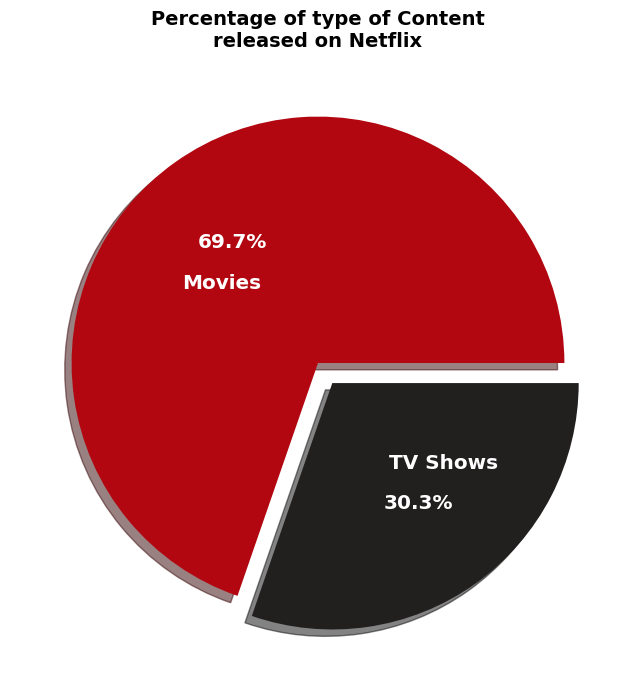

In [93]:
plt.figure(figsize = (10,8))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
plt.pie(content_type.values, labels = ["Movies", "TV Shows"], labeldistance = 0.4,shadow = True, explode = (0,0.1), autopct="%.1f%%", colors = [netflix_red,netflix_grey],
textprops ={"color":"white", "fontweight":"bold","fontsize":"x-large"})
plt.title("Percentage of type of Content\nreleased on Netflix", fontsize = 14, fontweight = "bold")
plt.show()

**5.2) Line Plot**

*   Yearly total releases of Movies / TV Shows.

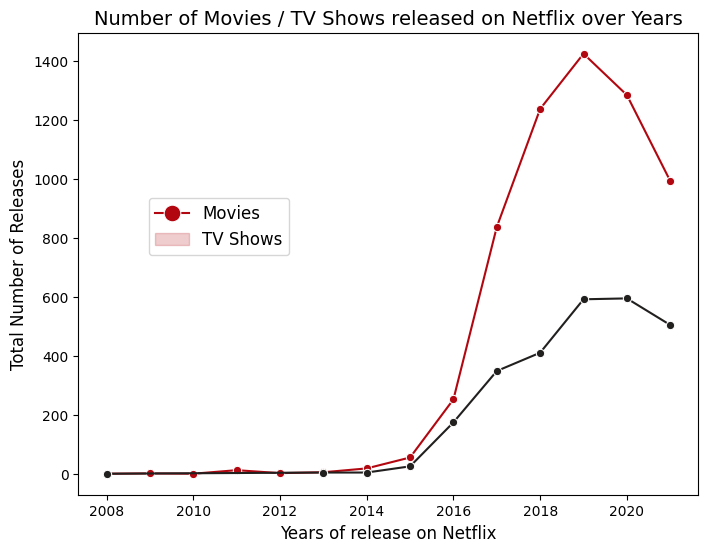

In [94]:
yearwise_number_of_unique_movies_released = nfdata[nfdata["type"] == "Movie"].groupby("year")["title"].nunique()
yearwise_number_of_unique_tvshows_released = nfdata[nfdata["type"] == "TV Show"].groupby("year")["title"].nunique()
plt.figure(figsize = (8,6))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
sns.lineplot(x = yearwise_number_of_unique_movies_released.index, y = yearwise_number_of_unique_movies_released.values, marker="o", color = netflix_red);
sns.lineplot(x = yearwise_number_of_unique_tvshows_released.index, y = yearwise_number_of_unique_tvshows_released.values, marker="o", color = netflix_grey);
plt.xlabel("Years of release on Netflix", fontsize = 12)
plt.ylabel("Total Number of Releases", fontsize = 12)
plt.legend(["Movies","TV Shows"], loc = "lower left", bbox_to_anchor = (0.1, 0.5), markerscale = 2, fontsize=12)
plt.title("Number of Movies / TV Shows released on Netflix over Years", fontsize = 14)
plt.show()

**5.3) Barplot:**

Top 10 Data

Top 10 Directors who released most content on Netflix

Top 10 Actors whose content was most released on Netflix

Top 10 Countries from where most content was released on Netflix

Top 10 Genre of content released on Netflix.


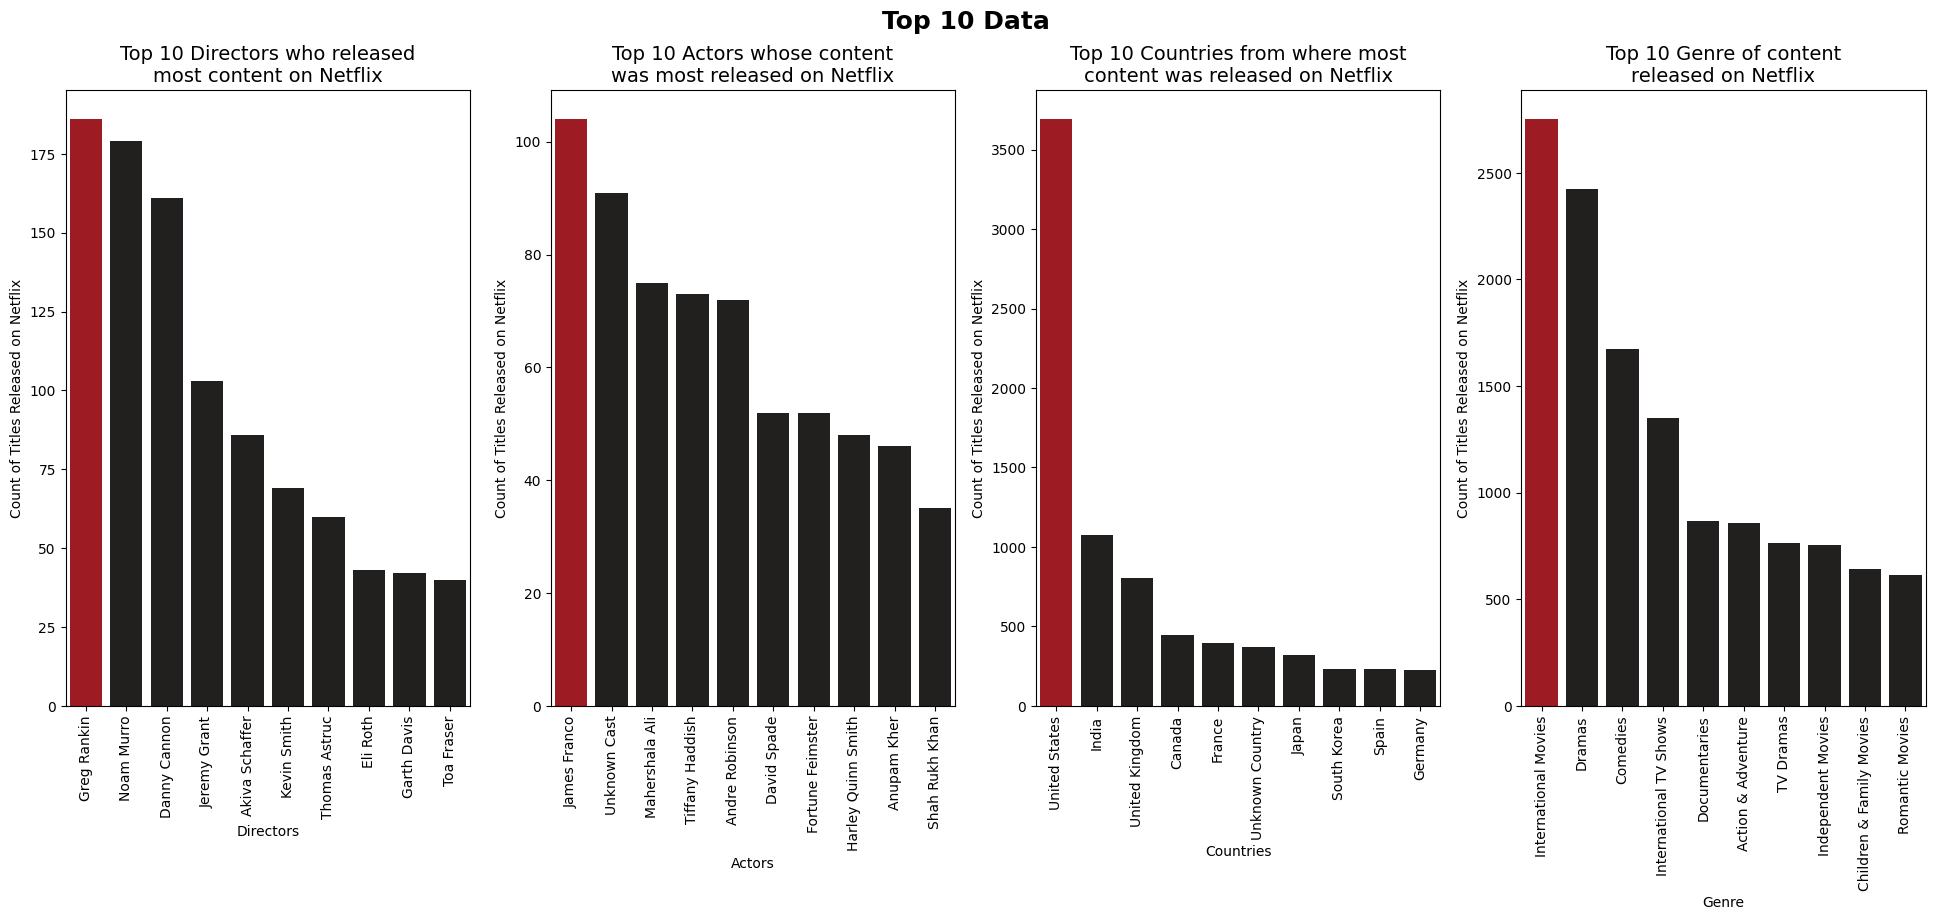

In [95]:
plt.figure(figsize = (24,8))
netflix_red = "#b20710"
netflix_grey = "#221f1f"

#Bar Plot for Top 10 Directors
plt.subplot(1,4,1)
top_10_directors_data = pd.DataFrame(top_10_directors).reset_index()
top10directors_cp = [netflix_grey if(x < max(top_10_directors_data["title"])) else netflix_red for x in top_10_directors_data["title"]]
sns.barplot(data = top_10_directors_data, x = "director", y = "title", palette = top10directors_cp )
plt.xticks(rotation = 90)
plt.xlabel("Directors")
plt.title("Top 10 Directors who released\nmost content on Netflix", size = 14)
plt.ylabel("Count of Titles Released on Netflix")

#Bar Plot for Top 10 Actors
plt.subplot(1,4,2)
top_10_actors_data = pd.DataFrame(top_10_cast).reset_index()
top10actors_cp= [netflix_grey if(x < max(top_10_actors_data["title"])) else netflix_red for x in top_10_actors_data["title"]]
sns.barplot(data = top_10_actors_data, x = "cast", y = "title", palette = top10actors_cp )
plt.xticks(rotation = 90)
plt.xlabel("Actors")
plt.title("Top 10 Actors whose content\nwas most released on Netflix", size = 14)
plt.ylabel("Count of Titles Released on Netflix")

#Bar Plot for Top 10 Countries
plt.subplot(1,4,3)
top_10_country_data = pd.DataFrame(top_10_country).reset_index()
top10country_cp = [netflix_grey if(x < max(top_10_country_data["title"])) else netflix_red for x in top_10_country_data["title"]]
sns.barplot(data = top_10_country_data, x = "country", y = "title", palette = top10country_cp )
plt.xticks(rotation = 90)
plt.xlabel("Countries")
plt.title("Top 10 Countries from where most\ncontent was released on Netflix", size = 14)
plt.ylabel("Count of Titles Released on Netflix")

#Bar Plot for Top 10 Genre
plt.subplot(1,4,4)
top_10_genre_data = pd.DataFrame(top_10_genre).reset_index()
top10genre_cp = [netflix_grey if(x < max(top_10_genre_data["title"])) else netflix_red for x in top_10_genre_data["title"]]
sns.barplot(data = top_10_genre_data, x = "listed_in", y = "title", palette = top10genre_cp )
plt.title("Top 10 Genre of content\nreleased on Netflix", size = 14)
plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Count of Titles Released on Netflix")
plt.suptitle("Top 10 Data", size = 18, fontweight = "bold")
plt.show()

**5.4) Distplot**

Let's check the releases per year for movies

Let's check the releases per year for tv shows

These are general content release years and not netflix release years

<ipython-input-96-c89de92385d1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_title_duplicates_removed_data["release_year"], color = netflix_red, label = "Movies")
<ipython-input-96-c89de92385d1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tvshow_title_duplicates_removed_data["rele

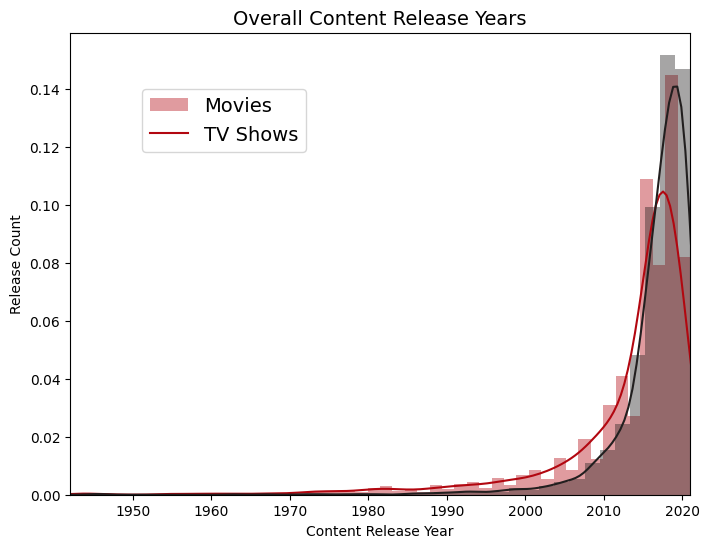

In [96]:
movie_title_duplicates_removed_data = nfdata[nfdata["type"]=="Movie"].drop_duplicates(subset="title")
tvshow_title_duplicates_removed_data = nfdata[nfdata["type"]=="TV Show"].drop_duplicates(subset="title")
max_year = [max(tvshow_title_duplicates_removed_data["release_year"]) if max(tvshow_title_duplicates_removed_data["release_year"]) > max(movie_title_duplicates_removed_data["release_year"]) else max(movie_title_duplicates_removed_data["release_year"])]
min_year = [min(tvshow_title_duplicates_removed_data["release_year"]) if min(tvshow_title_duplicates_removed_data["release_year"]) > min(movie_title_duplicates_removed_data["release_year"]) else min(movie_title_duplicates_removed_data["release_year"])]
plt.figure(figsize = (8,6))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
sns.distplot(movie_title_duplicates_removed_data["release_year"], color = netflix_red, label = "Movies")
sns.distplot(tvshow_title_duplicates_removed_data["release_year"], color = netflix_grey, label = "TV Shows")
plt.xlim(min_year[0],max_year[0])
plt.legend(["Movies","TV Shows"], loc = "upper left", bbox_to_anchor = (0.1, 0.9), fontsize=14)
plt.xlabel("Content Release Year")
plt.ylabel("Release Count")
plt.title("Overall Content Release Years",fontsize=14)
plt.show()

**5.5) Countplot**

Count the number of TV Shows by their number of seasons

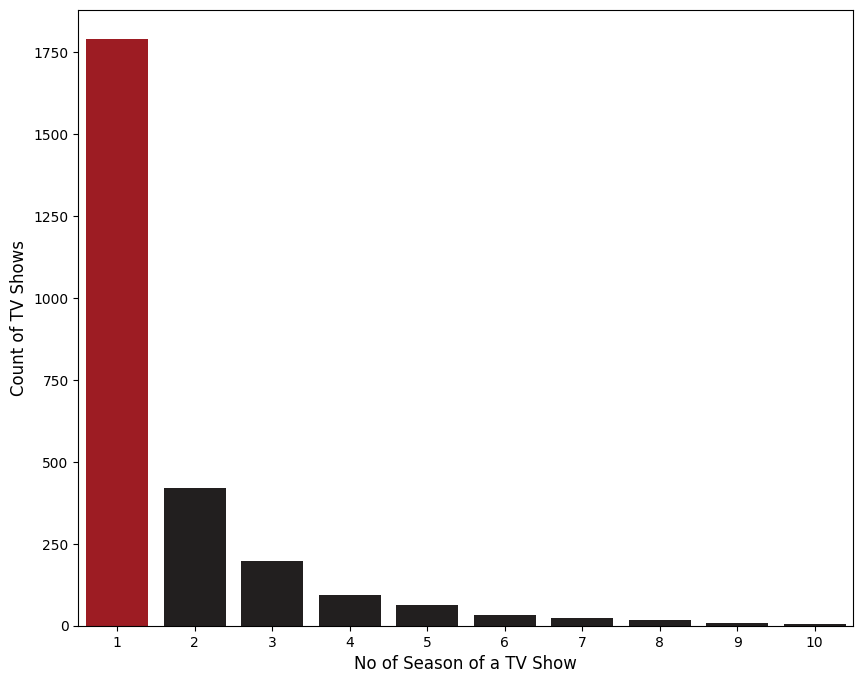

In [97]:
plt.figure(figsize = (10,8))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
#Count Plot to count the number of TV Shows by seasons
tvshows_without_duplicate_titles = nfdata[(nfdata["no_of_seasons"]!=0) & (nfdata["type"]=="TV Show") ].drop_duplicates(subset="title")
topseasons_cp = [netflix_grey if(x < tvshows_without_duplicate_titles["no_of_seasons"].value_counts().values[0]) else netflix_red for x in tvshows_without_duplicate_titles["no_of_seasons"
].value_counts().values]
sns.countplot(data = tvshows_without_duplicate_titles, x = "no_of_seasons", palette = topseasons_cp)
plt.xlim(-0.5,9.5)
plt.xlabel("No of Season of a TV Show", fontsize = 12)
plt.ylabel("Count of TV Shows", fontsize = 12)
plt.show()

**5.6) Histogram**

Let's find the value of movie duration time to understand which duration movies are most released on Netfli

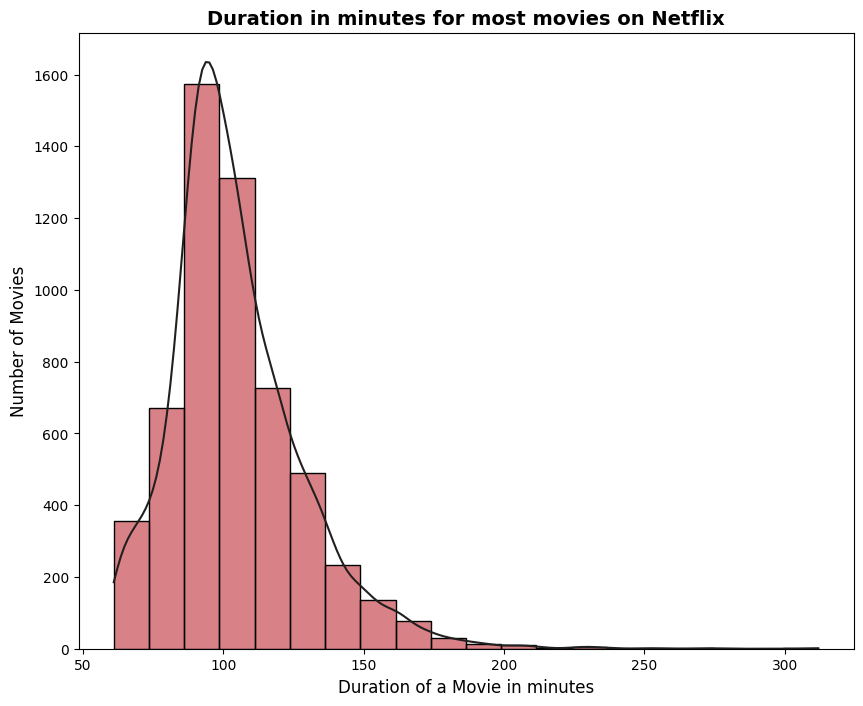

In [98]:
plt.figure(figsize = (10,8))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
duration_of_movie = nfdata[(nfdata["Minutes"]>60) & (nfdata["type"] == "Movie")].drop_duplicates(subset = "title")
topduration_cp = [netflix_grey if(x < duration_of_movie["Minutes"].value_counts().values[0]) else netflix_red for x in duration_of_movie["Minutes"].value_counts().values]
line = sns.histplot(data = duration_of_movie, x = "Minutes", bins = 20, kde = True, color = netflix_red)
line.lines[0].set_color(netflix_grey)
plt.xlabel("Duration of a Movie in minutes", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Duration in minutes for most movies on Netflix", fontsize = 14, fontweight = "bold")
plt.show()


**5.7) Scatter Plot**

Check the top 3 genre release pattern by year on Netflix

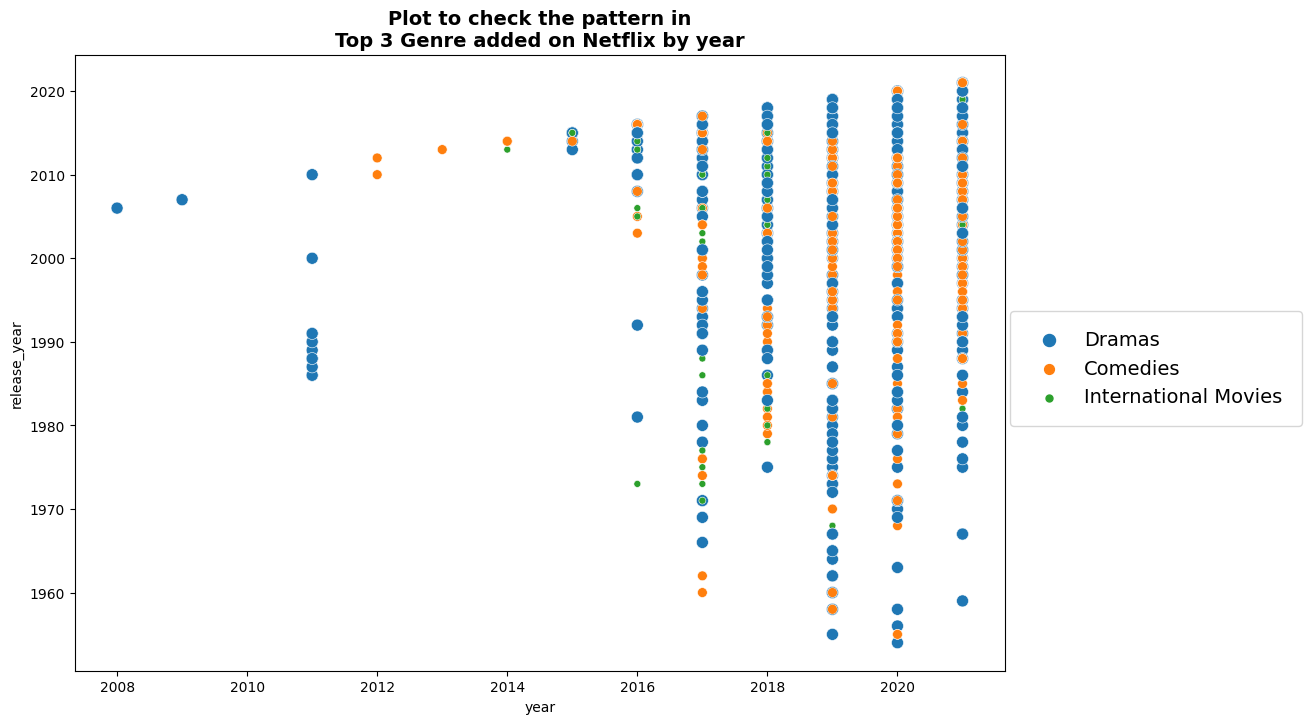

In [99]:
top_3_genre_df = nfdata[(nfdata["listed_in"].isin(top_10_genre[:3].index))].drop_duplicates(subset="title")
plt.figure(figsize = (12,8))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
sns.scatterplot(data = top_3_genre_df, x = "year", y = "release_year", size = "listed_in", sizes = (25,75), hue="listed_in")
plt.legend(loc = "upper right", bbox_to_anchor = (1.33, 0.6), fontsize=14, borderpad= 1)
plt.title("Plot to check the pattern in\nTop 3 Genre added on Netflix by year", fontsize = 14, fontweight = "bold")
plt.show()

**5.8) Correlation Heat Map**

This is to understand the immediate % of relation between the immediately related data

<ipython-input-100-00310227e6aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  netflix_correlation = nfdata_no_duplicate.corr()
<ipython-input-100-00310227e6aa>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nfdata.corr(), annot=True, cmap = cmap)


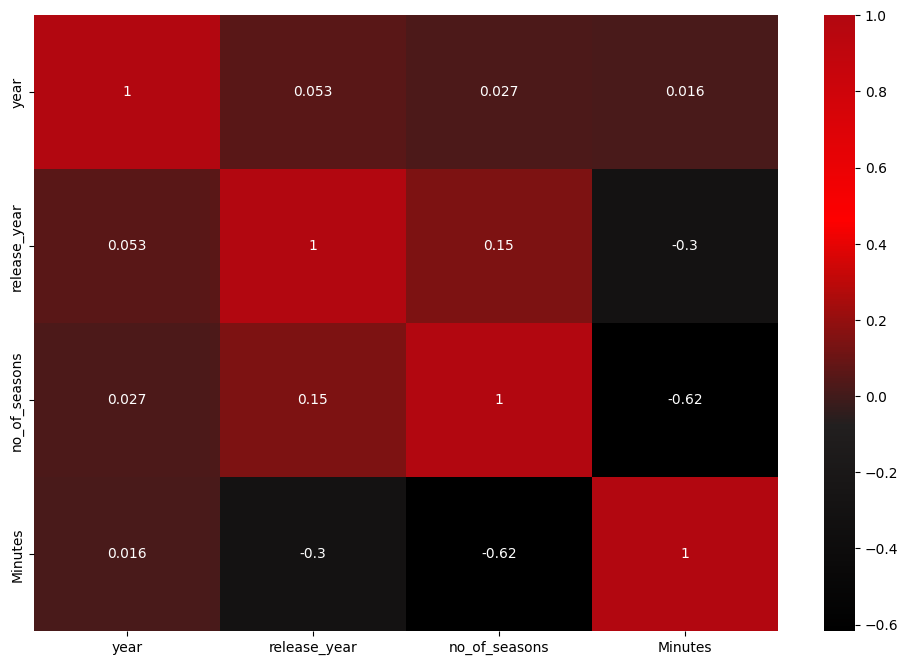

In [100]:
nfdata_no_duplicate = nfdata.drop_duplicates(subset="title")
netflix_correlation = nfdata_no_duplicate.corr()
plt.figure(figsize = (12,8))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
cmap = clr.LinearSegmentedColormap.from_list('netflix_colors', ["black",netflix_grey,"red",netflix_red])
sns.heatmap(nfdata.corr(), annot=True, cmap = cmap)
plt.show()


**5.9) Pair Plot**

How Genre of both Movies and TV Shows are ploted compared to other columns like:

*   Year they were added on netflix
*   The year in which they originally got released
*   no of seasons in case of a TV Show genre
*   duration in minutes in case of a movie genre


<Figure size 3000x2000 with 0 Axes>

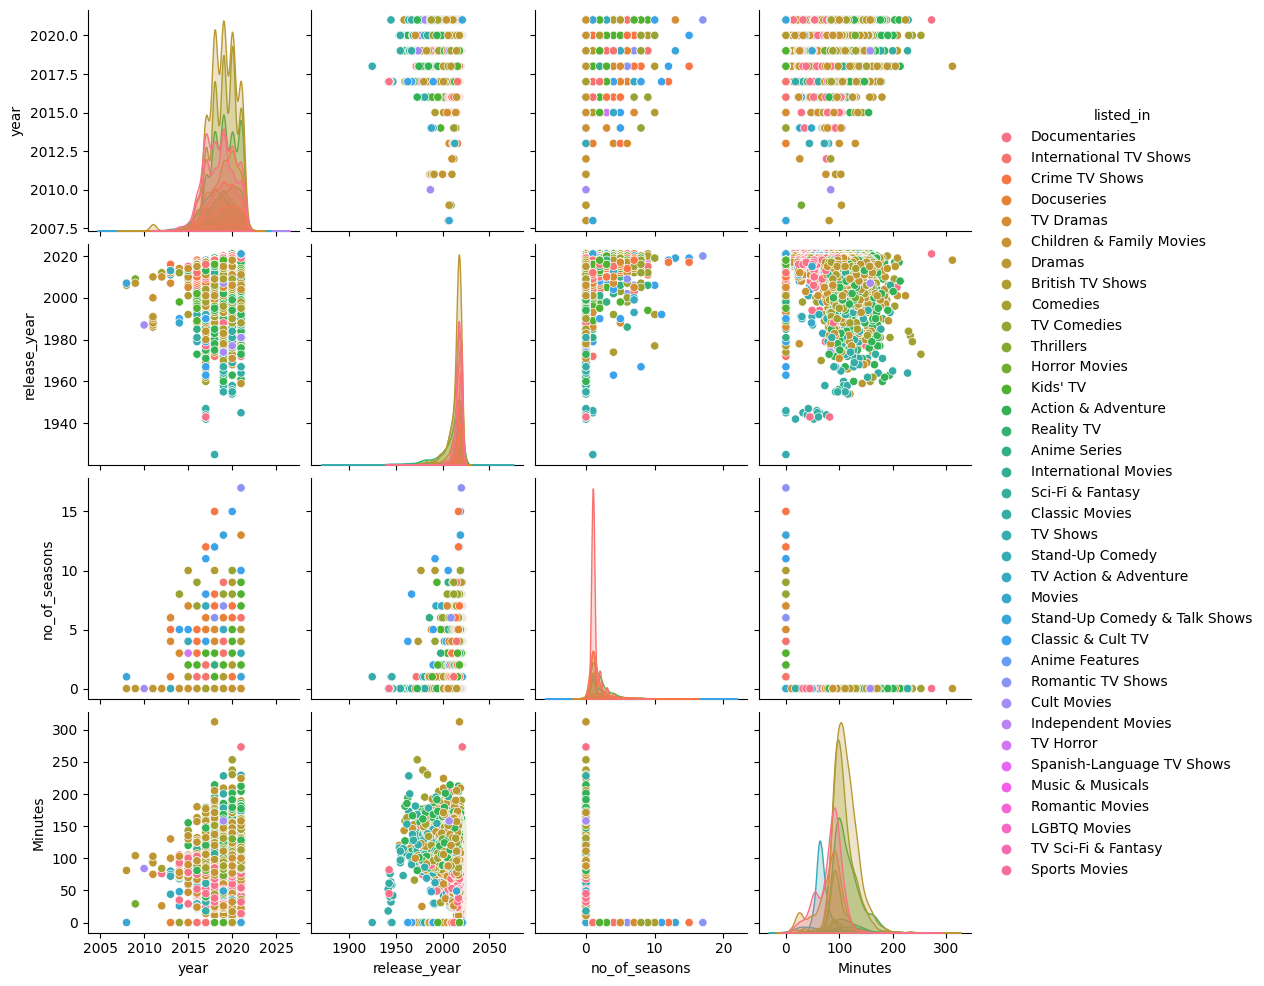

In [101]:
plt.figure(figsize=(30,20))
netflix_duplicate_free_data = nfdata.drop_duplicates(subset = "title")
sns.pairplot(data = netflix_duplicate_free_data, hue = "listed_in")
plt.show()

How year in which a Movie and TV Shows were added on Netflix are ploted compared to other columns like:

*   The year in which they originally got released
*   No of seasons in case of a TV Show release year on Netflix
*   Duration in minutes in case of a movie release year on Netflix

<Figure size 3000x2000 with 0 Axes>

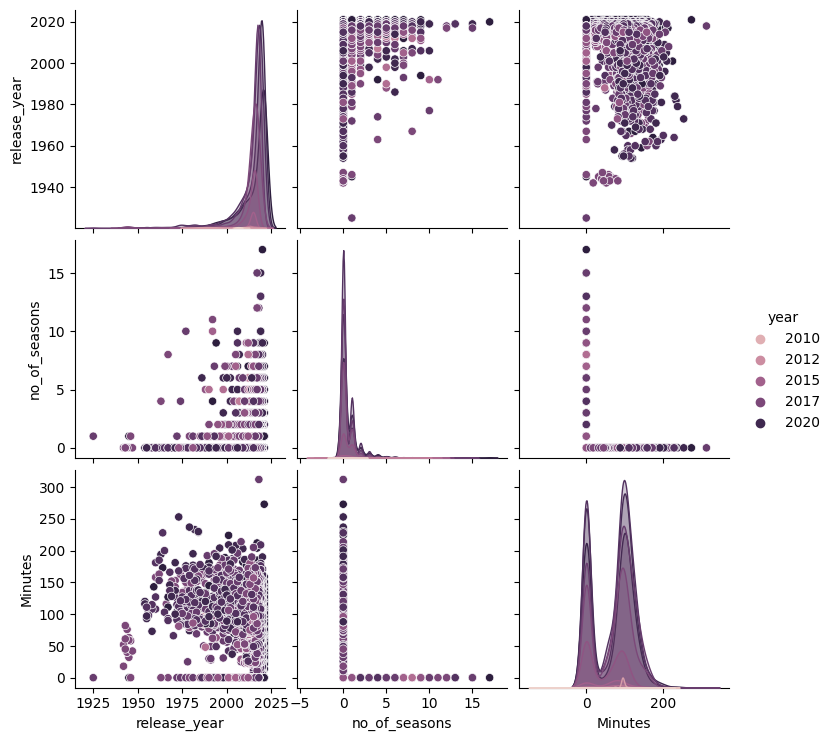

In [102]:
plt.figure(figsize=(30,20))
netflix_duplicate_free_data = nfdata.drop_duplicates(subset = "title")
sns.pairplot(data = netflix_duplicate_free_data, hue = "year")
plt.show()

**5.10) Bar Plot Horizontal**

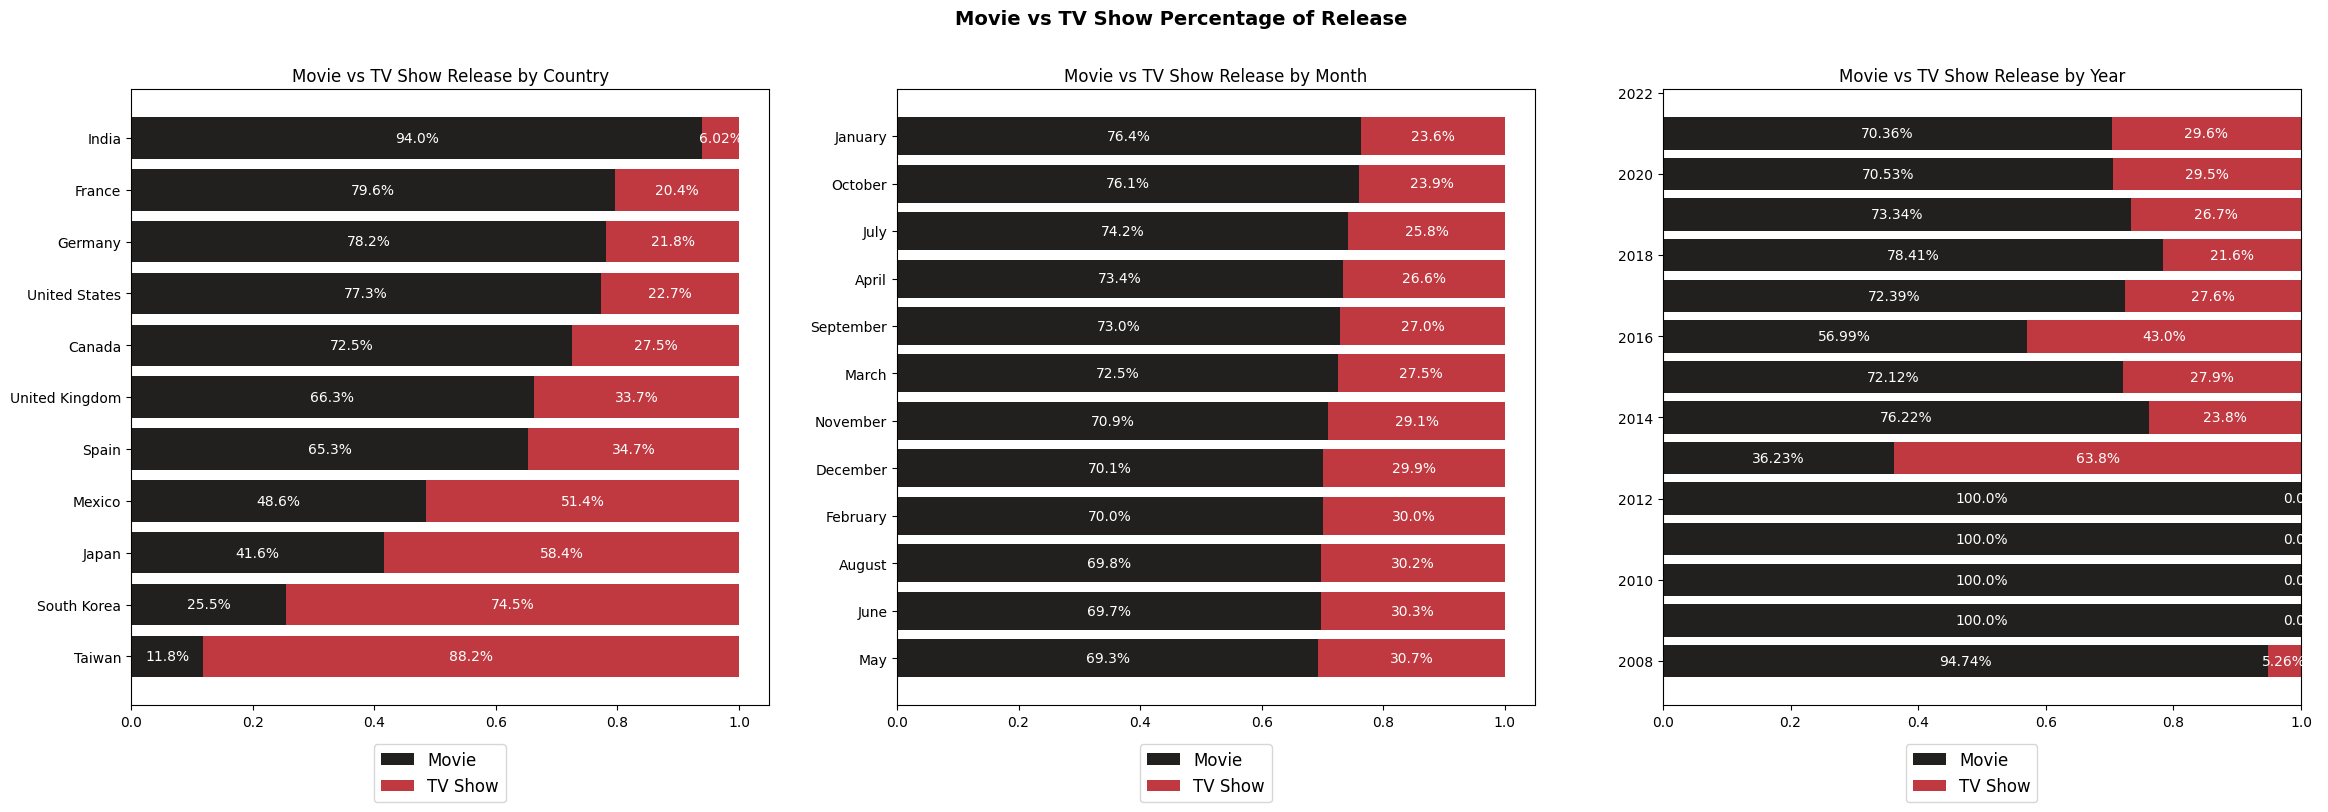

In [103]:
plt.figure(figsize=(28,8))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
#Top Countries by Movies % release
plt.subplot(1,3,1)
top_countries = nfdata[nfdata["country"] != "Unknown Country"]['country'].value_counts()[:11].index
countrywise_release_data = nfdata[(nfdata["country"] != "Unknown Country")][['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[top_countries]
countrywise_release_data['sum'] = countrywise_release_data.sum(axis=1)
countrywise_release_data_ratio = (countrywise_release_data.T / countrywise_release_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
plt.barh(countrywise_release_data_ratio.index, countrywise_release_data_ratio['Movie'], color=netflix_grey, label='Movie')
plt.barh(countrywise_release_data_ratio.index, countrywise_release_data_ratio['TV Show'], left=countrywise_release_data_ratio['Movie'], color=netflix_red, alpha=0.8, label='TV Show')
for i in countrywise_release_data_ratio.index:
  plt.annotate(f"{countrywise_release_data_ratio['Movie'][i]*100:.3}%", xy=(countrywise_release_data_ratio['Movie'][i]/2, i),va = 'center', ha='center',fontsize = 10, color='white')
for i in countrywise_release_data_ratio.index:
  plt.annotate(f"{countrywise_release_data_ratio['TV Show'][i]*100:.3}%", xy=(countrywise_release_data_ratio['Movie'][i]+countrywise_release_data_ratio['TV Show'][i]/2, i),va = 'center', ha='center',fontsize=10, color='white',)
plt.legend(loc = "upper right", bbox_to_anchor = (0.6, -0.05), fontsize=12)
plt.title("Movie vs TV Show Release by Country", fontsize = 12)
#Top Months by Movies % release
plt.subplot(1,3,2)
top_month_release = nfdata["month"].value_counts().index
monthwise_release_data = nfdata[["type", "month"]].groupby("month")["type"].value_counts().unstack().loc[top_month_release]
monthwise_release_data["sum"] = monthwise_release_data.sum(axis=1)
monthwise_release_data_ratio = (monthwise_release_data.T / monthwise_release_data["sum"]).T[["Movie", "TV Show"]].sort_values(by="Movie",ascending=False)[::-1]
plt.barh(monthwise_release_data_ratio.index, monthwise_release_data_ratio["Movie"], color=netflix_grey, label="Movie")
plt.barh(monthwise_release_data_ratio.index, monthwise_release_data_ratio["TV Show"], left=monthwise_release_data_ratio["Movie"], color=netflix_red, alpha=0.8, label="TV Show")
for i in monthwise_release_data_ratio.index:
  plt.annotate(f"{monthwise_release_data_ratio['Movie'][i]*100:.3}%", xy=(monthwise_release_data_ratio["Movie"][i]/2, i),va = "center", ha="center",fontsize = 10, color="white")
for i in monthwise_release_data_ratio.index:
  plt.annotate(f"{monthwise_release_data_ratio['TV Show'][i]*100:.3}%", xy=(monthwise_release_data_ratio["Movie"][i]+monthwise_release_data_ratio["TV Show"][i]/2, i),va = "center", ha="center",fontsize=10, color="white",)
plt.legend(loc = "upper right", bbox_to_anchor = (0.6, -0.05), fontsize=12)
plt.title("Movie vs TV Show Release by Month", fontsize = 12)
#Top Year by Movies % release
plt.subplot(1,3,3)
top_year_release = nfdata["year"].value_counts().index
yearwise_release_data = nfdata[["type", "year"]].groupby("year")["type"].value_counts().unstack().loc[top_year_release]
yearwise_release_data["sum"] = yearwise_release_data.sum(axis=1)
yearwise_release_data_ratio = (yearwise_release_data.T / yearwise_release_data["sum"]).T[["Movie", "TV Show"]].sort_values(by="Movie",ascending=False)[::-1]
yearwise_release_data_ratio["TV Show"] = yearwise_release_data_ratio["TV Show"].fillna(0)
plt.barh(yearwise_release_data_ratio.index, yearwise_release_data_ratio["Movie"], color=netflix_grey, label="Movie")
plt.barh(yearwise_release_data_ratio.index, yearwise_release_data_ratio["TV Show"], left=yearwise_release_data_ratio["Movie"], color=netflix_red, alpha=0.8, label="TV Show")
for i in yearwise_release_data_ratio.index:
  plt.annotate(f"{yearwise_release_data_ratio['Movie'][i]*100:.4}%", xy=(yearwise_release_data_ratio["Movie"][i]/2, i),va = "center", ha="center",fontsize = 10, color="white")
for i in yearwise_release_data_ratio.index:
  plt.annotate(f"{yearwise_release_data_ratio['TV Show'][i]*100:.3}%", xy=(yearwise_release_data_ratio["Movie"][i]+yearwise_release_data_ratio["TV Show"][i]/2, i),va = "center", ha="center",fontsize=10, color="white",)
plt.legend(loc = "upper right", bbox_to_anchor = (0.6, -0.05), fontsize=12)
plt.title("Movie vs TV Show Release by Year", fontsize = 12)
plt.suptitle("Movie vs TV Show Percentage of Release", fontsize=14, fontweight ="bold")
plt.show()


Looking at the visualisation above we can understand the following:
1. Movie vs TV Show Release by Top 10 countries:
India has released the highest number of movies till date on Netflix.
Mexico has released almost equal number of movies and TV shows on Netflix.
Taiwan has released most TV shows.
2. Movie vs TV Show releases by Month of release on Netflix
We can observe that almost every month other than May, June and August more than 70% releases have been movies.
3. Movie vs TV show release on Netflix by Year
We can see that initial 5 years the content released by Netflix was movies.
Netflix started uploading TV shows more from 2013.
Since 2018 we can observe that the percent of TV shows have been constantly increase year by year and at the same time the content of upload of movies is reducing at the same level. But having said, it is not a significant change.

**5.11) Dodge Bar Chart**

Let's check the last 5 years content uploade differentiation between Movies and TV Shows


<Figure size 1000x800 with 0 Axes>

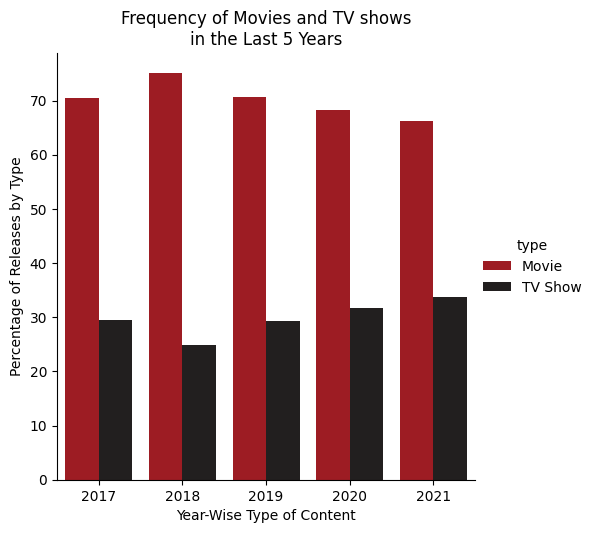

In [104]:
plt.figure(figsize=(10,8))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
#Last 5 Years TV Shows vs Movies released on Netflix
netflix_drop_duplicate = nfdata.drop_duplicates(subset = "title")
last_5_years_data_by_type = netflix_drop_duplicate[netflix_drop_duplicate["year"]>2016].groupby("year")["type"].value_counts(normalize = True).mul(100).rename('percent').reset_index().round(2)
dbc = sns.catplot(data = last_5_years_data_by_type, x = "year", y = "percent", hue ="type", kind = "bar", legend = True, palette=[netflix_red,netflix_grey])
dbc.set_axis_labels("Year-Wise Type of Content","Percentage of Releases by Type")
plt.title("Frequency of Movies and TV shows\nin the Last 5 Years")
plt.show()


**5.12) Outliers Identification through Box Plot**


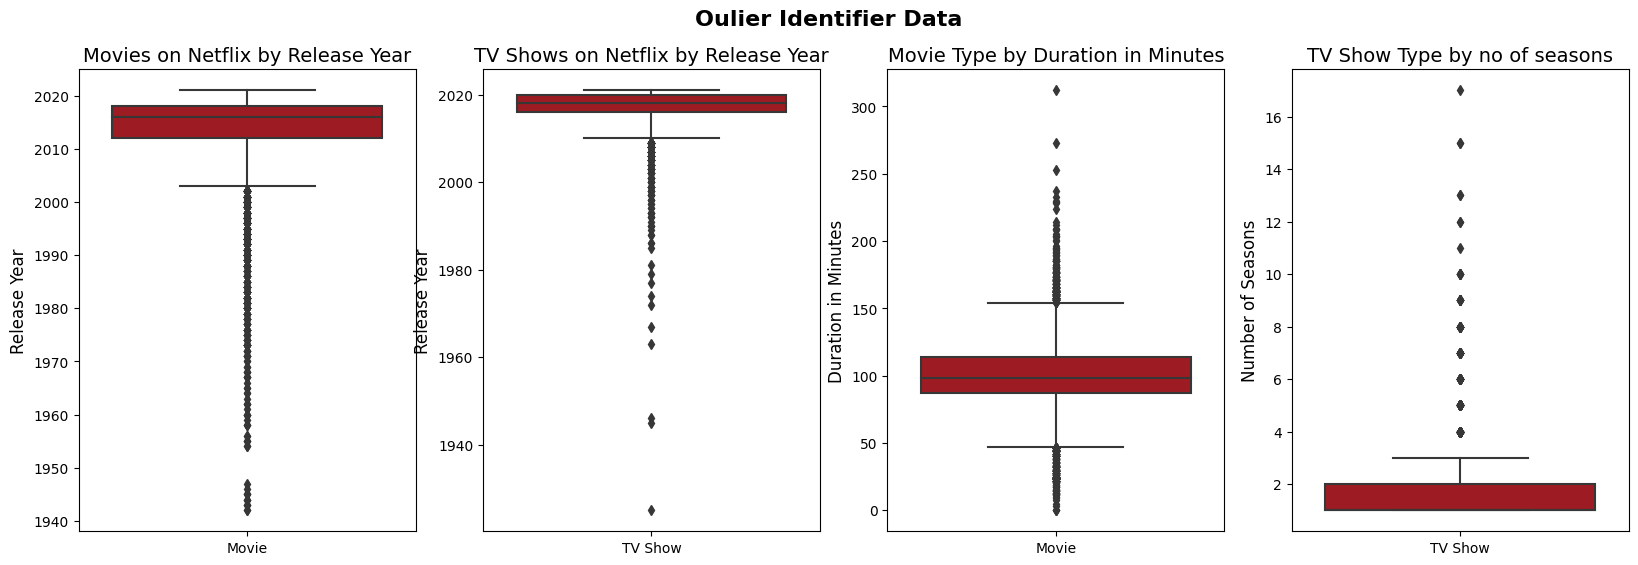

In [105]:
netflix_no_duplicate = nfdata.drop_duplicates(subset = "title")
netflix_movie_no_duplicate = netflix_no_duplicate[netflix_no_duplicate["type"] == "Movie"]
netflix_tvshow_no_duplicate = netflix_no_duplicate[netflix_no_duplicate["type"] == "TV Show"]
plt.figure(figsize=(20,6))
netflix_red = "#b20710"
netflix_grey = "#221f1f"
plt.subplot(1,4,1)
sns.boxplot(data = netflix_movie_no_duplicate, x = "type", y ="release_year", color= netflix_red)
plt.title("Movies on Netflix by Release Year", fontsize = 14)
plt.xlabel("")
plt.ylabel("Release Year", fontsize = 12)
plt.subplot(1,4,2)
sns.boxplot(data = netflix_tvshow_no_duplicate, x = "type", y ="release_year", color = netflix_red)
plt.title("TV Shows on Netflix by Release Year", fontsize = 14)
plt.xlabel("")
plt.ylabel("Release Year", fontsize = 12)
plt.subplot(1,4,3)
sns.boxplot(data = netflix_movie_no_duplicate, x = "type", y ="Minutes", color = netflix_red)
plt.title("Movie Type by Duration in Minutes", fontsize = 14)
plt.xlabel("")
plt.ylabel("Duration in Minutes", fontsize = 12)
plt.subplot(1,4,4)
sns.boxplot(data = netflix_tvshow_no_duplicate[netflix_tvshow_no_duplicate["no_of_seasons"]!=0], x = "type", y ="no_of_seasons", color = netflix_red)
plt.title("TV Show Type by no of seasons", fontsize = 14)
plt.xlabel("")
plt.ylabel("Number of Seasons", fontsize = 12)
plt.suptitle("Oulier Identifier Data", fontweight = "bold", fontsize = 16)
plt.show()


Understanding outlier data is indeed crucial for identifying patterns and gaining insights into the content uploaded by Netflix. Based on the provided plot, we can draw the following observations:

1. Movies: The majority of movies released on Netflix fall within the original release years ranging from around 2012 to 2018. Movies released outside this range can be considered outliers.

2. TV Shows: The highest number of TV shows released on Netflix are primarily from original release years after 2018 until around 2020. TV shows released outside this range can be considered outliers.

3. Movie Duration: The movies that are most commonly released on Netflix have a runtime or duration ranging between 90 to 120 minutes.

4. TV Show Seasons: The TV shows that are most frequently released on Netflix typically consist of 1 to 2 seasons.

These insights provide an understanding of the trends and patterns in the Netflix dataset, allowing for further analysis and exploration of content preferences and distribution patterns.

**Recommendations:**

Based on the analysis of the Netflix dataset, the following recommendations can be made:

1. Movie Duration: Netflix should consider releasing movies with durations between 90 to 120 minutes, as this duration range seems to resonate well with viewers.

2. Content Selection: Netflix should evaluate and remove older movies that are no longer performing well and focus on onboarding more recent movies to cater to the audience's preferences.

3. Focus on Indian Movies: Considering the high viewership of movies in India, Netflix can prioritize onboarding more movies from the Indian film industry to cater to the demand in this market.

4. Taiwanese TV Shows: Since Taiwanese viewers have shown a higher interest in TV shows, Netflix can explore opportunities to onboard more TV shows from Taiwan to capture this specific audience segment.

5. International Movie Genre: Given the success of the "International Movie" genre, Netflix should consider expanding its library in this category to cater to the diverse preferences of audiences from different countries.

6. Movie vs. TV Shows: While TV shows are gaining traction, it is recommended to continue focusing on regularly onboarding movies, as they have historically performed better than TV shows.

7. Comedy Genre: To capitalize on the growing interest in comedy content, Netflix should prioritize onboarding more content in the comedy genre, as there has been a noticeable increase in viewership in recent years.

These recommendations aim to leverage the insights gained from the analysis to inform content selection and distribution strategies, ultimately improving the viewer experience and meeting the evolving demands of the audience.